In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Reading train and test CSV files
train_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/train.csv')
test_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/test.csv')

# Drop data that doesn't have 'sii'
train_df = train_df.dropna(subset=['sii'])

# Drop columns that contain 'PCIAT', because this is not in the test dataset
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='PCIAT')))]

train_df = train_df.drop(['id'], axis=1)
train_df = pd.get_dummies(train_df)

X = train_df.drop(['sii'], axis=1)
y = train_df['sii']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Impute missing values in the training data
knn_imputer = KNNImputer(n_neighbors=3)
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

# Standardize the imputed data
scaler = StandardScaler()  # or MinMaxScaler() if you prefer scaling between 0 and 1
X_train_imputed = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_imputed = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)


# # Fit PCA to explain up to 95% variance
# pca = PCA(n_components=0.95)
# X_train_encoded = pca.fit_transform(X_train_imputed)
# X_test_encoded = pca.transform(X_test_imputed)
# print("Number of components:", X_train_encoded.shape[1])  # Check how many components are retained
# 
# 
# # Autoencoder did not work that well for me. But here is its implementation if you want to play with it.
# # Set up the Autoencoder model
# input_dim = X_train_imputed.shape[1]
# encoding_dim = 20  # Set this to the dimension of the encoded representation
# 
# # Define encoder
# input_layer = Input(shape=(input_dim,))
# encoder = Dense(encoding_dim, activation='tanh')(input_layer)
# 
# # Define decoder
# decoder = Dense(input_dim, activation='sigmoid')(encoder)
# 
# # Define the full autoencoder model
# autoencoder = Model(inputs=input_layer, outputs=decoder)
# autoencoder.compile(optimizer='adam', loss='mse')
# 
# # Train the autoencoder on the imputed and standardized data
# autoencoder.fit(X_train_imputed, X_train_imputed, epochs=256, batch_size=32, shuffle=True, validation_split=0.2)
# 
# # Use only the encoder part for dimensionality reduction
# encoder_model = Model(inputs=input_layer, outputs=encoder)
# 
# # Encode the imputed and standardized data
# X_train_encoded = encoder_model.predict(X_train_imputed)
# X_train_encoded = pd.DataFrame(X_train_encoded)
# X_test_encoded = encoder_model.predict(X_test_imputed)
# X_test_encoded = pd.DataFrame(X_test_encoded)

Number of components: 49
Epoch 1/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2342 - val_loss: 1.1795
Epoch 2/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 1.1508 - val_loss: 1.1085
Epoch 3/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 1.1295 - val_loss: 1.0571
Epoch 4/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 1.0549 - val_loss: 1.0211
Epoch 5/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 1.0061 - val_loss: 0.9913
Epoch 6/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.9620 - val_loss: 0.9648
Epoch 7/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.9496 - val_loss: 0.9413
Epoch 8/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.9539 - val_loss: 0.9201
Epoch 9/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.9461 - val_loss: 0.9010
Epoch 10/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.8776 - val_loss: 0.8838
Epoch 11/256
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.8536 - val_loss: 0.8684
Epoch 12/256
41/41

In [217]:
X_train_imputed.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,-0.975688,-0.748255,-1.075414,0.699195,0.258235,0.457196,0.496359,0.436892,1.396957,0.393761,...,-0.394505,-0.401695,-0.52446,1.741247,-0.530123,-0.562102,-0.582745,1.702311,-0.561163,-0.567733
1,-1.268448,1.336442,-0.359259,-0.650725,-1.902759,-1.162503,-1.247977,-0.738821,-0.199850,-1.346137,...,-0.394505,-0.401695,-0.52446,-0.574301,-0.530123,1.779038,1.716016,-0.587437,-0.561163,-0.567733
2,-0.097408,-0.748255,-0.985895,-0.386006,-0.045655,-0.322313,-0.296521,-1.032749,0.104304,-0.866165,...,-0.394505,2.489451,-0.52446,-0.574301,-0.530123,1.779038,1.716016,-0.587437,-0.561163,-0.567733
3,1.073631,-0.748255,-1.343972,-0.075556,1.203669,0.536547,0.337783,-0.665339,-0.656080,-0.866165,...,-0.394505,-0.401695,-0.52446,1.741247,-0.530123,-0.562102,-0.582745,-0.587437,-0.561163,1.761391
4,0.780871,-0.748255,1.789205,-0.437574,0.663421,-0.009576,-0.058657,-0.297929,-0.732119,-0.926162,...,-0.394505,2.489451,-0.52446,-0.574301,-0.530123,1.779038,-0.582745,-0.587437,1.782014,-0.567733


Best parameters found:  {'alpha': 1}
Mean Squared Error: 1.1579908675799087
Mean Absolute Error: 0.684931506849315
Accuracy: 0.5150684931506849
Quadratic Weighted Kappa: 0.36260053619302945


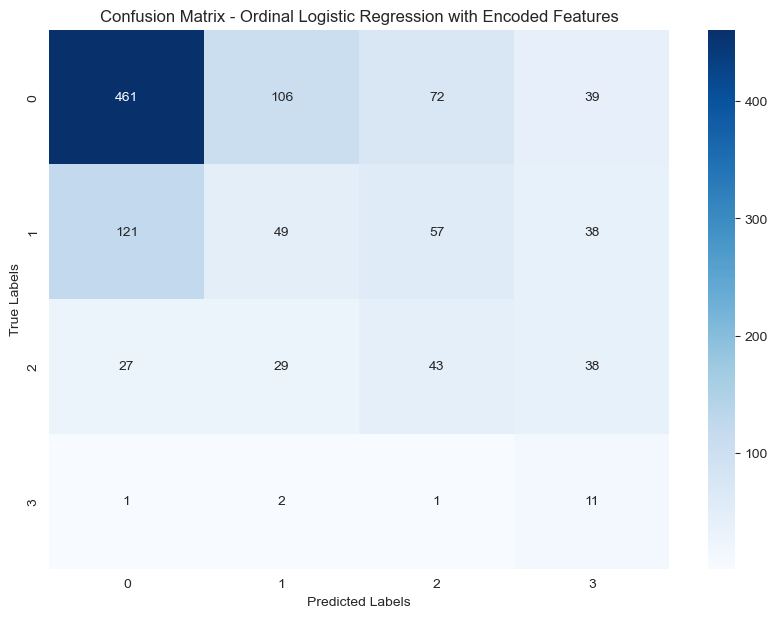

In [239]:
# Import necessary libraries for ordinal logistic regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, cohen_kappa_score
from imblearn.over_sampling import SMOTE
from mord import LogisticIT  # Ordinal Logistic Regression (LogisticIT model)
from sklearn.linear_model import LogisticRegression

# 1. Apply SMOTE for class imbalance on the encoded features
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# 2. Define the Ordinal Logistic Regression model
model = LogisticIT()

# 3. Set up StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Define a parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization parameter for LogisticIT
}

# Convert labels to integer type for compatibility
y_train_balanced = y_train_balanced.astype(int)
y_test = y_test.astype(int)

# 5. Grid search with StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train_balanced, y_train_balanced)

# 6. Best parameters and model fitting
print("Best parameters found: ", grid_search.best_params_)
model = grid_search.best_estimator_

# 7. Predicting on the encoded test set
y_pred = model.predict(X_test_encoded)

# 8. Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Accuracy: {accuracy}')
print(f'Quadratic Weighted Kappa: {kappa}')

# 9. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix - Ordinal Logistic Regression with Encoded Features')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [103]:
import numpy as np
import pandas as pd
from mord import LogisticIT
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, cohen_kappa_score
from scipy.stats import mode

class OrdinalRandomForest:
    def __init__(self, n_estimators=10, sample_fraction=0.8, random_state=42):
        self.n_estimators = n_estimators
        self.sample_fraction = sample_fraction
        self.models = []
        self.random_state = random_state
    
    def fit(self, X, y):
        # Ensure y is in integer format for ordinal classification
        y = y.astype(int)
        
        np.random.seed(self.random_state)
        self.models = []
        
        for i in range(self.n_estimators):
            # Bootstrap sampling
            X_resampled, y_resampled = resample(X, y, n_samples=int(self.sample_fraction * len(y)), random_state=self.random_state + i)
            
            # Train an instance of LogisticIT on the bootstrapped sample
            model = LogisticIT()
            model.fit(X_resampled, y_resampled)
            self.models.append(model)
    
    def predict(self, X):
        # Collect predictions from each model
        all_preds = np.array([model.predict(X).astype(int) for model in self.models])
        
        # Use majority vote across all models (will be integer)
        y_pred, _ = mode(all_preds, axis=0)
        return y_pred.ravel()
    
    def predict_proba(self, X):
        # Average the predicted probabilities across all models
        all_probs = np.array([model.predict_proba(X) for model in self.models])
        return np.mean(all_probs, axis=0)

# Example Usage
# Assuming X_train_encoded, y_train, X_test_encoded, and y_test are already prepared
ensemble_model = OrdinalRandomForest(n_estimators=10, sample_fraction=0.8, random_state=42)
ensemble_model.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = ensemble_model.predict(X_test_encoded)

# Ensure y_pred is integer-based
y_pred = y_pred.astype(int)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')

print(f'Ensemble Accuracy: {accuracy}')
print(f'Quadratic Weighted Kappa: {kappa}')


Ensemble Accuracy: 0.6313868613138686
Quadratic Weighted Kappa: 0.39745289513270954


In [154]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.impute import KNNImputer
from mord import LogisticIT
from sklearn.base import clone
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import mode

# Load and prepare data
train_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/train.csv')
train_df = train_df.dropna(subset=['sii'])
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='PCIAT')))]
train_df = train_df.drop(['id'], axis=1)
train_df = pd.get_dummies(train_df)

X = train_df.drop(['sii'], axis=1)
y = train_df['sii']
y = y.astype(int)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=41)

# Impute missing values
knn_imputer = KNNImputer(n_neighbors=3)
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

# 1. Apply SMOTE for class imbalance on the encoded features
smote = SMOTE(random_state=42)
X_train_imputed, y_train = smote.fit_resample(X_train_imputed, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

# Prepare different encoded versions of X_train and X_test
encoded_versions = {}

# 1. pd.get_dummies
encoded_versions['dummies'] = (X_train_std, X_test_std)

# 2. Autoencoder
input_dim = X_train_std.shape[1]
encoding_dim = 30  # Adjust based on data complexity

input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)
autoencoder = Model(inputs=input_layer, outputs=decoder_layer)
autoencoder.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5)
autoencoder.fit(X_train_std, X_train_std, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])

encoder_model = Model(inputs=input_layer, outputs=encoder_layer)
X_train_autoencoded = encoder_model.predict(X_train_std)
X_test_autoencoded = encoder_model.predict(X_test_std)
encoded_versions['autoencoder'] = (X_train_autoencoded, X_test_autoencoded)

# 3. PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
encoded_versions['pca'] = (X_train_pca, X_test_pca)

# Train and predict with each encoding scheme using LogisticIT
predictions = []

for encoding, (X_train_enc, X_test_enc) in encoded_versions.items():
    model = LogisticIT()
    model.fit(X_train_enc, y_train)
    y_pred = model.predict(X_test_enc).astype(int)
    predictions.append(y_pred)

# Majority voting
predictions = np.array(predictions)
y_pred_ensemble, _ = mode(predictions, axis=0)
y_pred_ensemble = y_pred_ensemble.ravel()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ensemble)
kappa = cohen_kappa_score(y_test, y_pred_ensemble, weights='quadratic')

print(f'Ensemble Accuracy: {accuracy}')
print(f'Ensemble Quadratic Weighted Kappa: {kappa}')


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 1.1921 - val_loss: 0.7595
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.9811 - val_loss: 0.6480
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.8606 - val_loss: 0.5846
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.8502 - val_loss: 0.5435
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.8023 - val_loss: 0.5129
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.7784 - val_loss: 0.4925
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.7243 - val_loss: 0.4774
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.7300 - val_loss: 0.4660
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.7486 - val_loss: 0.4572
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.6781 - val_loss: 0.4501
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.7308 - val_loss: 0.4441
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step

Ensemble Mean Squared Error: 1.0082191780821919
Ensemble Mean Absolute Error: 0.6319634703196347
Ensemble Accuracy: 0.5351598173515981
Ensemble Quadratic Weighted Kappa: 0.3750471733715752


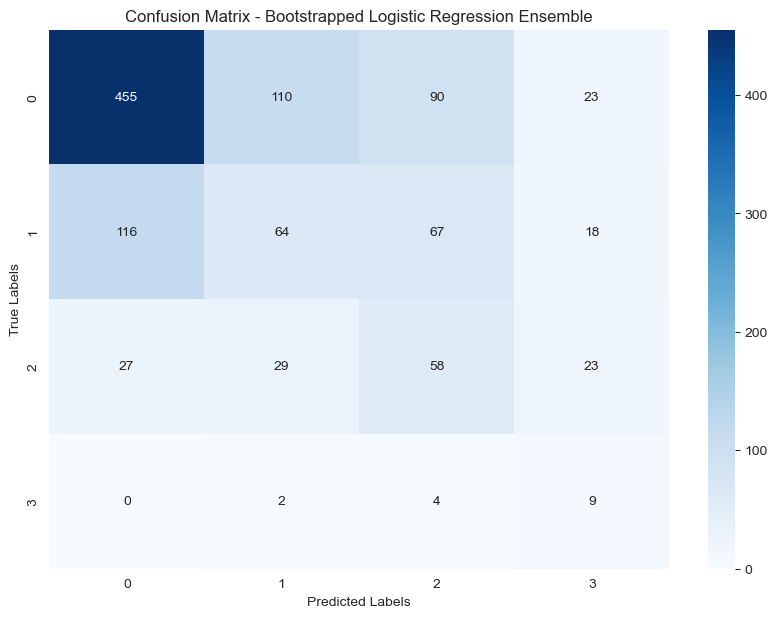

In [209]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from mord import LogisticIT
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Apply SMOTE for class imbalance on the encoded features
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)
y_train = y_train.astype(int)
# Number of bootstrap samples
n_bootstrap = 100

# Store predictions from all models
all_predictions = []

# Bootstrapping and model training
for i in range(n_bootstrap):
    # Bootstrap sampling
    X_train_resampled, y_train_resampled = resample(X_train_balanced, y_train_balanced, random_state=42 + i)
    y_train_resampled = y_train_resampled.astype(int)
    # Train LogisticIT model
    model = LogisticIT(alpha=grid_search.best_params_['alpha'])  # Use best alpha from GridSearch
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test_encoded)
    all_predictions.append(y_pred)

# Aggregate predictions using majority voting
all_predictions = np.array(all_predictions)
y_pred_ensemble, _ = mode(all_predictions, axis=0)
y_pred_ensemble = y_pred_ensemble.ravel()

# Model evaluation
mse = mean_squared_error(y_test, y_pred_ensemble)
mae = mean_absolute_error(y_test, y_pred_ensemble)
accuracy = accuracy_score(y_test, y_pred_ensemble)
kappa = cohen_kappa_score(y_test, y_pred_ensemble, weights='quadratic')

print(f'Ensemble Mean Squared Error: {mse}')
print(f'Ensemble Mean Absolute Error: {mae}')
print(f'Ensemble Accuracy: {accuracy}')
print(f'Ensemble Quadratic Weighted Kappa: {kappa}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix - Bootstrapped Logistic Regression Ensemble')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
